# Exam Project 2023
---

In this project, we will explore three distinct problems related to economics and optimization. Each problem presents a unique challenge and requires analytical thinking, problem-solving skills, and a deep understanding of the underlying concepts.

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## Necessities
The following are all the necessary libraries and imports needed for calculations and data visualization.

In [1]:
# Mathematical computation and symbol calculations
import sympy as sp
import numpy as np

# Plotting figures and graphs
import matplotlib.pyplot as plt

# Optimization
from scipy.optimize import minimize_scalar, fsolve
from scipy.optimize import minimize

## <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

We would like to verify that the optimal labor supply choice is as given, which we do by first defining our baseline parameters and utility function. We then find the derivative of the utility function and set it equal to zero by using $sympy$ which has been imported. Finally, $L$ is being isolated, and the expression is simplified.

In [2]:
# Define the symbols
L, alpha, kappa, nu, w, tau, G = sp.symbols('L alpha kappa nu w tau G')

# Redefine the utility function
utility = alpha * sp.log(kappa + (1 - tau) * w * L) + (1 - alpha) * sp.log(G) - nu * L**2 / 2

# Calculate the derivative of the utility function with respect to L
d_utility = sp.diff(utility, L)

# Solve for L that makes the derivative equal to zero
optimal_L = sp.solve(d_utility, L)

# Simplify the expression for the optimal labor supply choice
optimal_L = sp.simplify(optimal_L[0])

# Display the optimal labor supply choice
print('The optimal labor supply choice is defined as follows:')
optimal_L

The optimal labor supply choice is defined as follows:


(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))

The sympy has some issues trying to solve the it symbolically since its a complex equation, but from doing the calculations on hand, it does appear to be the same as what we are looking for.

---

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

We want to illustrate how $L^{\star}(\tilde{w})$ depends on $w$, which we can do by first defining our baseline parameters and the range for w values. Next, we can calculate the labor supply for each value of $w$ where we make a list called “optimal_L_values” by iterating over the elements in the “w_values” list and applying substitutions to the symbol “optimal_L” using the given baseline parameters. $L^{\star}$ and $w$ can be plotted into a figure so that the relationship between them can be illustrated.

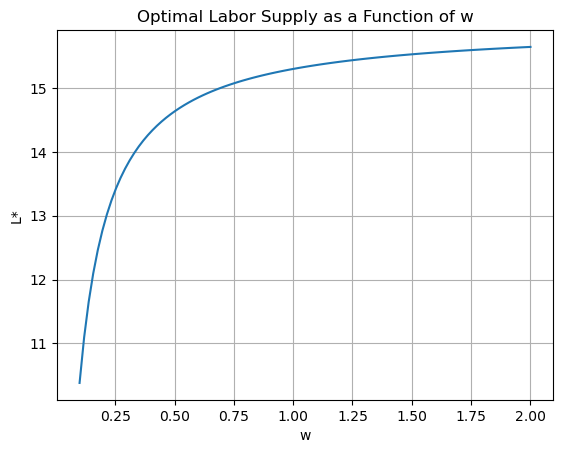

In [3]:
# Define our baseline parameter values
alpha_val = 0.5
kappa_val = 1.0
nu_val = 1 / (2 * 16**2)
tau_val = 0.30
G_val = 1.0

# Define the range for w values
w_values = np.linspace(0.1, 2.0, 100)

# Calculate the labor supply for each value of w
optimal_L_values = [optimal_L.subs([
    (alpha, alpha_val),
    (kappa, kappa_val),
    (nu, nu_val),
    (tau, tau_val),
    (G, G_val),
    (w, w_val)]) 
    
    for w_val in w_values]

# Plot the relationship between L* and w
plt.plot(w_values, optimal_L_values)
plt.xlabel('w')
plt.ylabel('L*')
plt.title('Optimal Labor Supply as a Function of w')
plt.grid(True)
plt.show()

The above figure shows the relationship between optimal labor supply choice $L^{\star}$ and the real wage $w$, where we can see that a small increase in the real wage gives a large increase in $L^{\star}$, but that this increase flattens out around $w≈0.4$. In other words, this means that in the beginning where there was a low real wage, there is a greater incentive to work more with small increases in the real wage, but that this increased utility later gradually diminishes due to the law of diminishing marginal utility. We can also see this from the slope of the curve, which is initially very high, but later flattens out and becomes lower.

---


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


We now want to visualize the optimal labor supply, government consumption, and worker utility for different values of tau using our given baseline parameters and expressions. Firstly we will define a range of values for tau using the “np.linspace” function. The tau_values list will contain 100 equally spaced values between 0.1 and 0.9. Then we initialize three empty lists to store the implied values and set the baseline value of $w=1.0$. Next, we iterate over each tau_val in the tau_values list and the optimal labor supply is being calculated for each tau_val. Government consumption and worker utility is being calculated based on the given parameters. After the loop, the values of L_values, G_values, and utility_values is being plot against the tau_values on three separate subplots. 

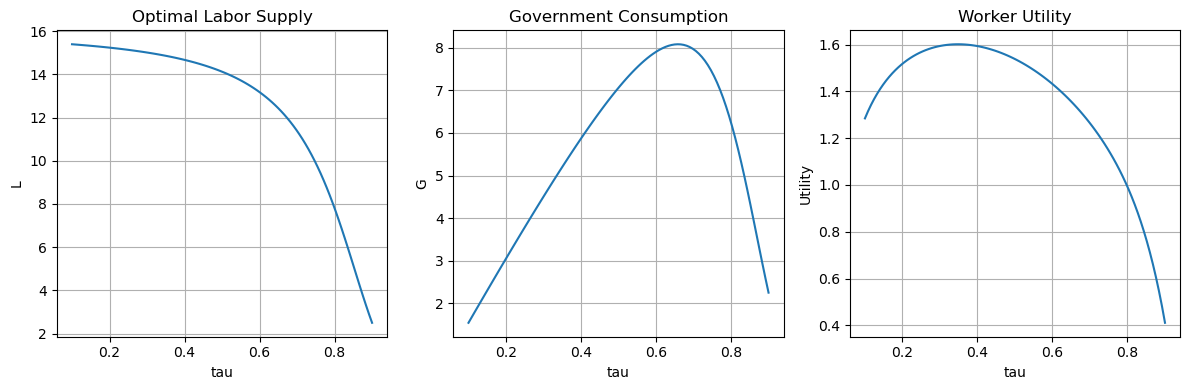

In [4]:
# Define the range for tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Initialize arrays to store the implied values
L_values = []
G_values = []
utility_values = []

# Set the baseline value of w
w_val = 1.0

# Calculate the implied values for each tau value
for tau_val in tau_values:
    # Calculate optimal labor supply (L)
    L_val = optimal_L.subs([
        (alpha, alpha_val),
        (kappa, kappa_val),
        (nu, nu_val),
        (tau, tau_val),
        (G, G_val),
        (w, (1 - tau_val) * w_val)])
        
    L_values.append(float(L_val))

    # Calculate government consumption (G)
    G_val = tau_val * w_val * L_val.subs(w, (1 - tau_val) * w_val)
    G_values.append(float(G_val))

    # Calculate worker utility
    utility_val = utility.subs([
        (alpha, alpha_val),
        (kappa, kappa_val),
        (nu, nu_val),
        (tau, tau_val),
        (G, G_val),
        (w, (1 - tau_val) * w_val),
        (L, L_val)])
    
    utility_values.append(float(utility_val))

# Plot the implied values of L, G, and utility for the grid of tau values
plt.figure(figsize=(12, 4))

# Plot optimal labor supply (L)
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('tau')
plt.ylabel('L')
plt.grid(True)
plt.title('Optimal Labor Supply')

# Plot government consumption (G)
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('tau')
plt.ylabel('G')
plt.grid(True)
plt.title('Government Consumption')

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('tau')
plt.ylabel('Utility')
plt.grid(True)
plt.title('Worker Utility')

plt.tight_layout()
plt.show()

On the figure "Optimal Labor Supply" we can see that a higher tax causes the number of hours worked to fall. This decline happens more slowly at first, where the curve is slightly declining, but gradually becomes steeper the higher the tax starts to rise. This decline is due to two mechanisms - namely the income and substitution effects. The income effect says that when taxes increase, one's disposable income will decrease, which can lower the incentive to work more since the workers will have less financial gain from additional labor. In addition, the substitution effect is also seen, where the lower disposable income causes the opportunity cost of leisure time to flatten relative to the wage earned from work.  

On the "Government Consumption" figure, we first see consumption increase when the tax increases, as more money comes in for consumption through the tax, but that this then at some point begins to fall sharply, as the effect of the number of hours worked then decreases quickly dominate, that the government consumption continues to fall even if the tax increases, due to the income and substitution effects of a higher tax.

Finally, we have the last figure "Worker utility", where it can be seen that the utility initially increases when the tax increases due to the positive effects of higher tax dominating such as funding public goods and services, but then you reach a point, where the negative effects of higher taxes on utility start to dominate, which is seen when utility then starts to fall that can be seen to be around $\tau=0.3$. 

---

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

We now want to find the socially optimal tax rate that maximizes the worker utility. We can do that by first defining an objective function called objective(tau) that calculates the negative of utility. In this objective function we calculate tilde_w, the optimal labor supply choice L_star, consumption C, government consumption G, and utility. Then we use the "minimize_scalar" function to find the tax rate that maximizes utility. Then we print the socially optimal tax rate and the corresponding utility value and finally plots the utility as a function of the tax rate.

Socially optimal tax rate (tau_star): 0.515
Corresponding utility (utility_star): 1.859


C:\Users\ketsi\AppData\Local\Temp\ipykernel_8636\426230027.py:16: RuntimeWarning: divide by zero encountered in log
  utility = np.log(C**alpha_val * G**(1 - alpha_val)) - nu_val * L_star**2 / 2
C:\Users\ketsi\AppData\Local\Temp\ipykernel_8636\426230027.py:7: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa_val + np.sqrt(kappa_val**2 + 4 * alpha_val / nu_val * tilde_w**2)) / (2 * tilde_w)


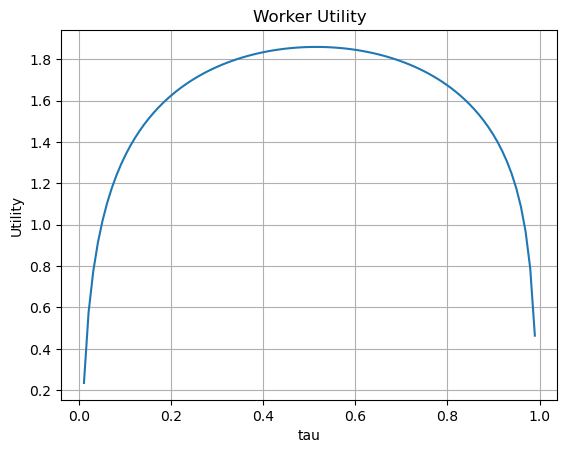

In [5]:
# Define the objective function to maximize (negative of utility)
def objective(tau):
    # Calculate tilde_w
    tilde_w = (1 - tau) * w_val

    # Calculate the corresponding optimal labor supply choice
    L_star = (-kappa_val + np.sqrt(kappa_val**2 + 4 * alpha_val / nu_val * tilde_w**2)) / (2 * tilde_w)

    # Calculate C
    C = kappa_val + (1 - tau) * w_val * L_star

    # Calculate G
    G = tau * w_val * L_star

    # Calculate utility (negative of utility to maximize)
    utility = np.log(C**alpha_val * G**(1 - alpha_val)) - nu_val * L_star**2 / 2

    return -utility

# Find the optimal tax rate that maximizes utility
result = minimize_scalar(objective, bounds=(0.0, 1.0), method='bounded')
tau_star = result.x
utility_star = -result.fun

# Print the socially optimal tax rate and the corresponding utility
print(f"Socially optimal tax rate (tau_star): {tau_star:.3f}")
print(f"Corresponding utility (utility_star): {utility_star:.3f}")

# Plot the utility as a function of tau
tau_values = np.linspace(0.0, 1.0, 100)
utility_values = [-objective(tau) for tau in tau_values]

plt.plot(tau_values, utility_values)
plt.xlabel('tau')
plt.ylabel('Utility')
plt.title('Worker Utility')
plt.grid(True)
plt.show()

It can be seen that the utility gradually increases as the tax increases, where it falls again when the tax becomes too high. We find that the top point is when the tax rate is 0.515, which gives a utility of 1.859.

---

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

We want to find the G which solves the given expression by using the optimal tax rate we found in the previous task. We start by defining a function called worker_problem where we also define the utility function, the equation to solve for optimal labor supply and the derivative of the utility function. We then use the fsolve function to solve for the optimal labor supply. Here we calculate the left-hand side (lhs) and the right-hand side (rhs) of an equation that relates government consumption and tax rate. Then define the parameters for Set 1 and 2 respectively and then redefine the baseline parameters. Finally, the fsolve function is being used to solve for the value of government consumption using the parameters from Set 1 and Set 2, respectively.

In [6]:
# Define the worker problem function
def worker_problem(G, tau, w, kappa, alpha, nu, sigma, rho, epsilon):
    # Calculate the effective wage
    w_tilde = (1 - tau) * w
    
    # Define the utility function
    def utility(L):
        C = kappa + (1 - tau) * w * L
        return (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(1-sigma)))**(1-rho) - 1) / (1 - rho) - nu * L**(1 + epsilon) / (1 + epsilon)
    
    # Define the equation to solve for optimal labor supply
    def equation(L):
        return utility(L) - utility_derivative(L)
    
    # Define the derivative of the utility function
    def utility_derivative(L):
        C = kappa + (1 - tau) * w * L
        return (1 - alpha) * G**((sigma-1)/sigma) * (alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(1-sigma) - 1) * (sigma/(1-sigma)) * (C**((sigma-1)/sigma - 1)) * (1 - tau) * w
    
    # Solve for optimal labor supply
    L_opt = fsolve(equation, 1)[0]
    
    # Calculate the left-hand side of the equation
    lhs = G
    
    # Calculate the right-hand side of the equation
    rhs = tau * w_tilde * L_opt
    
    return lhs - rhs

# Set the parameters for Set 1
sigma1 = 1.001
rho1 = 1.001
epsilon1 = 1.0

# Set the parameters for Set 2
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0

# Redefine baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = tau_star

# Solve for G using Set 1 parameters
G_solution_set1 = fsolve(worker_problem, 1.0, args=(tau, w, kappa, alpha, nu, sigma1, rho1, epsilon1))[0]

# Solve for G using Set 2 parameters
G_solution_set2 = fsolve(worker_problem, 1.0, args=(tau, w, kappa, alpha, nu, sigma2, rho2, epsilon2))[0]

# Print out the values
print(f"Solution for Set 1: G = {G_solution_set1:.3f}")
print(f"Solution for Set 2: G = {G_solution_set2:.3f}")

Solution for Set 1: G = 5.533
Solution for Set 2: G = 0.637


We here find the solution for Set 1 as $G = 5.533$ and for Set 2 as $G = 0.637$

---

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In order to find the socially optimal tax rate that maximizes worker utility while keeping the given expression we can firstly define an objective function called objective to maximize utility. Within the objective function, we calculate the effective wage, the optimal labor supply choice, the corresponding optimal government consumption and the utility. Then the difference between the given government consumption and the optimal government consumption is being found were
the objective value is the sum of utility and the squared difference between the given and optimal government consumption. Next, the minimize_scalar function is used to solve for the socially optimal tax rate for Set 1 and Set 2 by minimizing the objective function with the corresponding parameters.


In [7]:
# Define the objective function to maximize utility (negative of utility)
def objective(tau, G, w, kappa, alpha, nu, sigma, rho, epsilon):
    # Calculate the effective wage
    w_tilde = (1 - tau) * w
    
    # Calculate the corresponding optimal labor supply choice
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)
    
    # Calculate G_star
    G_star = tau * w * L_star
    
    # Calculate utility (negative of utility to maximize)
    utility = -(((alpha * (kappa + (1 - tau) * w * L_star)**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (1 - sigma)))**(1 - rho) - 1) / (1 - rho) - nu * L_star**(1 + epsilon) / (1 + epsilon)
    
    # Calculate the difference between G and G_star
    G_diff = G - G_star
    
    # Calculate the objective value
    objective_value = utility + G_diff**2
    
    return objective_value

# Define the bounds for tau
tau_bounds = (0, 1)

# Solve for the socially optimal tax rate for Set 1
result_set1 = minimize_scalar(lambda tau: objective(tau, G_solution_set1, w, kappa, alpha, nu, sigma1, rho1, epsilon1), bounds=tau_bounds, method='bounded')
tau_star_set1 = result_set1.x

# Solve for the socially optimal tax rate for Set 2
result_set2 = minimize_scalar(lambda tau: objective(tau, G_solution_set2, w, kappa, alpha, nu, sigma2, rho2, epsilon2), bounds=tau_bounds, method='bounded')
tau_star_set2 = result_set2.x

# Print out the values
print(f"Set 1: Socially optimal tax rate (tau_star) = {tau_star_set1:.3f}")
print(f"Set 2: Socially optimal tax rate (tau_star) = {tau_star_set2:.3f}")

Set 1: Socially optimal tax rate (tau_star) = 0.365
Set 2: Socially optimal tax rate (tau_star) = 0.045


The Socially optimal tax rate for Set 1 is found to be 0.365 and for Set 2 to be 0.045

---

## <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In this task we are asked to verify that $\ell_{t}=\left(\frac{(1\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits for the given values of $k$. We therefor start by define our symbols and profit function. Next, we calculate the derivative f the profit function with respect to 1 using the diff function from sympy and solves for the value of 1 that makes the derivative equal to zero using the solve function from the same package sympy. Lastly the expression for the optimal labor input choice is being simplified. 

In [8]:
# Define the symbols
l, kappa, eta, w = sp.symbols('l kappa eta w')

# Define the profit function
profit = kappa * l**(1 - eta) - w * l

# Calculate the derivative of the profit function with respect to l
d_profit = sp.diff(profit, l)

# Solve for l that makes the derivative equal to zero
optimal_l = sp.solve(d_profit, l)

# Simplify the expression for the optimal labor input choice
optimal_l = sp.simplify(optimal_l[0])

# Display the optimal labor input choice
print('The optimal labor input choice is as follows:')
optimal_l

The optimal labor input choice is as follows:


(kappa*(1 - eta)/w)**(1/eta)

---

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

We now consider this new dynamic version of the model, where we now are asked to calculate $H$. Therefore we start of by set the baseline paramerters and define the function named generate_shock_series(). The function generates a series of demand shocks using random numbers. The shocks are calculated based on a normal distribution and the given standard deviation (sigma_epsilon). The function also applies a specific formula to transform the shocks into a series of values (kappas). Next, another function named calculate_ex_post_value(shock_series) is being defined and calculates the ex-post value of the salon based on the given shock series. It iterates over each time period and calculates the optimal labor input, profits, adjustment costs, and overall ex-post value. The ex-post value is discounted over time using a discount factor (R) and accumulated. Then we define the function named approximate_expected_value(K) which approximates the ex-ante expected value of the salon by repeatedly generating shock series (K times) and calculating their ex-post values using the calculate_ex_post_value() function. The mean value of the ex-post values is then returned as the approximate expected value.
Lastly, we use the approximate_expected_value() function to give an approximated expected value of the salon. 



In [9]:
# Set the baseline parameters and policy parameters from Q1
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01)**(1/12)
eta = 0.5
w = 1.0

# Function to calculate the demand shock series
def generate_shock_series():
    np.random.seed(0)  # For reproducibility
    shocks = np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=120)
    logs_kappa = np.zeros(120)
    logs_kappa[0] = 0  # Initial shock
    for t in range(1, 120):
        logs_kappa[t] = rho * logs_kappa[t-1] + shocks[t]
    kappas = np.exp(logs_kappa)
    return kappas

# Function to calculate the ex-post value of the salon for a shock series
def calculate_ex_post_value(shock_series):
    l_previous = 0
    ex_post_value = 0
    for t in range(120):
        kappa = shock_series[t]
        l = ((1 - eta) * kappa / w) ** (1 / eta)
        profits = kappa * l**(1 - eta) - w * l
        adjustment_cost = (l != l_previous) * iota
        ex_post_value += R**(-t) * (profits - adjustment_cost)
        l_previous = l
    return ex_post_value

# Function to approximate the ex-ante expected value of the salon
def approximate_expected_value(K):
    ex_post_values = np.zeros(K)
    for k in range(K):
        shock_series = generate_shock_series()
        ex_post_values[k] = calculate_ex_post_value(shock_series)
    return np.mean(ex_post_values)

# Approximate the expected value of the salon
K = 10000
expected_value = approximate_expected_value(K)

print(f"The approximated expected value of the salon (H) is: {expected_value:.3f}")

The approximated expected value of the salon (H) is: 35.468


---

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

We consider policies on the given form where we want to calculate $H$ to see if it improved profitability. Firstly, we define the funciton calculate_ex_post_value_new_policy that calculates the ex-post value of the salon for a shock series with the new policy by iterating over a time period of 120 units, updates the labor allocation based on the shock series, calculates profits, adjustment costs, and accumulates the ex-post value using a discount factor. Then we define the function approximate_expected_value_new_policy that approximates the ex-ante expected value of the salon with the new policy. Here a series of shock values is generated, calls the calculate_ex_post_value_new_policy function for each shock series, and calculates the mean of the resulting ex-post values. Next, the expected value of the salon with the new policy is being calculated and then printed. 

In [10]:
# Function to calculate the ex-post value of the salon for a shock series with the new policy
def calculate_ex_post_value_new_policy(shock_series, delta):
    l_previous = 0
    ex_post_value = 0
    for t in range(120):
        kappa = shock_series[t]
        l_star = ((1 - eta) * kappa / w) ** (1 / eta)
        diff = abs(l_previous - l_star)
        if diff > delta:
            l = l_star
        else:
            l = l_previous
        profits = kappa * l**(1 - eta) - w * l
        adjustment_cost = (l != l_previous) * iota
        ex_post_value += R**(-t) * (profits - adjustment_cost)
        l_previous = l
    return ex_post_value

# Function to approximate the ex-ante expected value of the salon with the new policy
def approximate_expected_value_new_policy(K, delta):
    ex_post_values = np.zeros(K)
    for k in range(K):
        shock_series = generate_shock_series()
        ex_post_values[k] = calculate_ex_post_value_new_policy(shock_series, delta)
    return np.mean(ex_post_values)

# Approximate the expected value of the salon with the new policy
delta = 0.05
expected_value_new_policy = approximate_expected_value_new_policy(K, delta)

print(f"The approximated expected value of the salon with the new policy (H) is: {expected_value_new_policy:.3f}")

The approximated expected value of the salon with the new policy (H) is: 36.050


We see that the approximated expected value of the salon with the new policy is 36.050 and therefore higher than the 35.468 we founded in the previous task. Therefore, we can also conclude that this new policy improves the profitability as the expected value represents the average outcome or return that can be expected from the salon where factors such as profits, adjustment costs, and the discount are being considered.

---

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

Now we want to find the optimal $\Delta$ maximizing $H$ and illustrate the result. To do this we start off by defining the funtion employment_policy that calculates the employment level (ell). Then the function “h” is defined and the function objective that defines the objective function for optimization and generates random values for kappa, calculates the employment levels (ell) using the employment policy, and calculates the expected value of the salon (H) based on h. Here is important to understand that it returns a negative number of H since the optimization aims to maximize it. Next, we set the parameters and optimize using the minimize_scalar function from SciPy where we can achieve the optimal delta and the maximum value of H. Lastly, we print the result and plot it to illustrate the relationship between delta and the expected value of the salon (H). 

Optimal Delta: 0.31048735265919347
Maximum H: 58.351558307636544


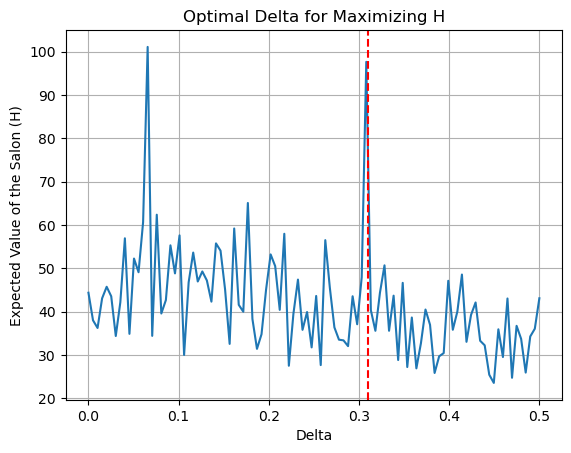

In [11]:
# Define the employment policy
def employment_policy(kappa, w, eta, delta, ell_previous):
    ell_star = ((1 - eta) * kappa / w) ** (1 / eta)
    diff = np.abs(ell_previous - ell_star)
    return np.where(diff > delta, ell_star, ell_previous)

# Define the function h
def h(kappa, ell, w, eta, delta):
    T = len(kappa)
    ell_previous = np.roll(ell, 1)
    ell_previous[0] = 0
    adjustment_cost = iota * (ell != ell_previous)
    values = R ** (-np.arange(T)) * (kappa * ell ** (1 - eta) - w * ell - adjustment_cost)
    return np.sum(values)

# Define the objective function for optimization
def objective(delta):
    H_sum = 0
    for _ in range(K):
        epsilon = np.random.normal(loc=-0.5 * sigma_epsilon ** 2, scale=sigma_epsilon, size=120)
        log_kappa = np.insert(rho * np.cumsum(epsilon[:-1]) + epsilon[0], 0, 0)
        kappa = np.exp(log_kappa)
        kappa[kappa < 0] = 0

        ell = np.zeros(120)
        ell_previous = 0
        for t in range(120):
            ell[t] = employment_policy(kappa[t], w, eta, delta, ell_previous)
            ell_previous = ell[t]

        H_sum += h(kappa, ell, w, eta, delta)

    H = H_sum / K
    return -H

# Set the parameters
np.random.seed(0)
K = 100
eta = 0.5
w = 1.0

# Perform the optimization
result = minimize_scalar(objective, bounds=(0, 0.5), method='bounded')
optimal_delta = result.x
max_H = -result.fun

# Print the results
print("Optimal Delta:", optimal_delta)
print("Maximum H:", max_H)

# Plot the results
delta_values = np.linspace(0, 0.5, 100)
H_values = [-objective(delta) for delta in delta_values]
plt.plot(delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('Expected Value of the Salon (H)')
plt.title('Optimal Delta for Maximizing H')
plt.grid(True)
plt.axvline(x=optimal_delta, color='r', linestyle='--')
plt.show()

We here see the optimal delta for maximizing $H$ which is when $delta=0.31$ where $H=58.35$ as seen in the plot being showed above. 

---

**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.

The alternative policy considers a cost-based threshold that takes into account the adjustment cost and the potential increase in profits. This approach aims to balance the costs of adjusting the labor input with the potential gains in profitability. 

The alternative employment policy can be defined as follows:

$$\ell_t = \begin{cases}
\ell_t^* & \text{if } |\ell_{t-1} - \ell_t^*| > \text{cost\_threshold} \\
\ell_{t-1} & \text{else}
\end{cases}$$

where $\ell_t^*$ is the optimal labor input at time $t$ calculated using the previous formula, and $\text{cost\_threshold}$ is the threshold based on the adjustment cost and the potential increase in profits.

Firstly, we define the function employment_policy_alt where it calculates the optimal labor supply using a cost-based threshold approach. It determines the difference between the previous labor supply and the optimal labor supply based on the cost threshold. If the difference is greater than the cost threshold, it chooses the optimal labor supply - otherwise, it keeps the previous labor supply. Then we define the function objective_alt that is similar to the previous objective function in the last task but now uses the alternative employment policy. Then we optimize by using the minimize_scalar function to find the optimal delta. Here it uses the objective_alt function as the objective to minimize. Lastly, we print and plot the result to illustrate the relationship between delta and the expected value of the salon (H) at the new policy. 

Optimal Delta (Alternative Policy): 0.2603094640873799
Maximum H (Alternative Policy): 67.38756756439948


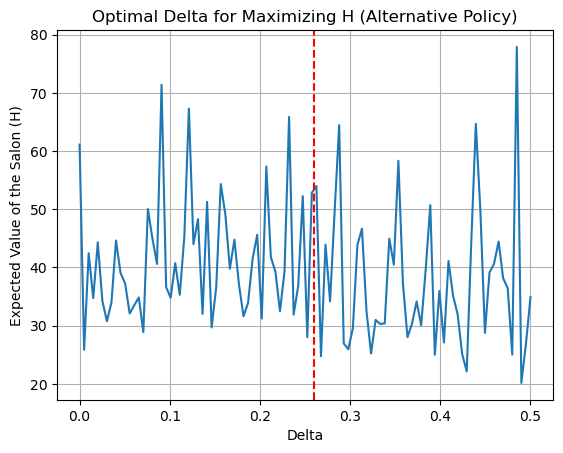

In [12]:
# Define the employment policy with cost-based threshold
def employment_policy_alt(kappa, w, eta, delta, ell_previous):
    ell_star = ((1 - eta) * kappa / w) ** (1 / eta)
    diff = np.abs(ell_previous - ell_star)
    cost_threshold = (1 - eta) * w * ell_star ** (-eta) * delta
    return np.where(diff > cost_threshold, ell_star, ell_previous)

# Define the objective function for optimization
def objective_alt(delta):
    H_sum = 0
    for _ in range(K):
        epsilon = np.random.normal(loc=-0.5 * sigma_epsilon ** 2, scale=sigma_epsilon, size=120)
        log_kappa = np.insert(rho * np.cumsum(epsilon[:-1]) + epsilon[0], 0, 0)
        kappa = np.exp(log_kappa)
        kappa[kappa < 0] = 0

        ell = np.zeros(120)
        ell_previous = 0
        for t in range(120):
            ell[t] = employment_policy_alt(kappa[t], w, eta, delta, ell_previous)
            ell_previous = ell[t]

        H_sum += h(kappa, ell, w, eta, delta)

    H = H_sum / K
    return -H

# Perform the optimization for the alternative policy
result_alt = minimize_scalar(objective_alt, bounds=(0, 0.5), method='bounded')
optimal_delta_alt = result_alt.x
max_H_alt = -result_alt.fun

# Print the results for the alternative policy
print("Optimal Delta (Alternative Policy):", optimal_delta_alt)
print("Maximum H (Alternative Policy):", max_H_alt)

# Plot the results for the alternative policy
delta_values = np.linspace(0, 0.5, 100)
H_values_alt = [-objective_alt(delta) for delta in delta_values]
plt.plot(delta_values, H_values_alt)
plt.xlabel('Delta')
plt.ylabel('Expected Value of the Salon (H)')
plt.title('Optimal Delta for Maximizing H (Alternative Policy)')
plt.grid(True)
plt.axvline(x=optimal_delta_alt, color='r', linestyle='--')
plt.show()


---

The result is here plotted and can be seen above, where we find the optimal delta for maximizing H as $delta=0.26$ where $H=67.39$ and therefore improves the profitability compared to the previous policy. 

## <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We want to do an implementation of a refined global optimizer with multi-start for optimizing the Griewank function. The optimizer aims to find the global minimum of the function while considering local minima as well. Therefore, we start off by defining a function called refined_global_optimizer that implements a refined global optimization algorithm. Then we initialize the variable to keep track of the best solution found so far (x_best) and its corresponding function value (f_best). A loop is then made that iterates K_max times. In each iteration, it generates a random initial guess within the specified bounds. If the current iteration is greater than or equal to the warm-up iterations (K_warmup), aparameter chi is then being calculated and used to compute the effective initial guess (x_effective), which is a combination of the random initial guess and the previous best solution. Hereafter, we use the minimize function with the BFGS method to optimize the Griewank function starting from the initial guess. It obtains the optimized solution (x_opt) and its corresponding function value (f_opt). Next, the function updates the best solution and its function value if the current solution is better than the previous best. It also checks if the best function value is below the specified tolerance and where it breaks the loop - if that’s the case. Lastly, it returns the best solution found (x_best) and the list of effective initial guesses (x_effective_list) where the final result for "Question 1" is printed, including the optimal solution and its corresponding function value and a scatter plot is generated to visualize the variation of effective initial guesses over the iterations. 

Optimization Result for Question 1:
x_optimal_q1 = [ -9.42006734 -22.19222132], f(x_optimal_q1) = 0.14544231643853456
Number of iterations for Question 1: 1000


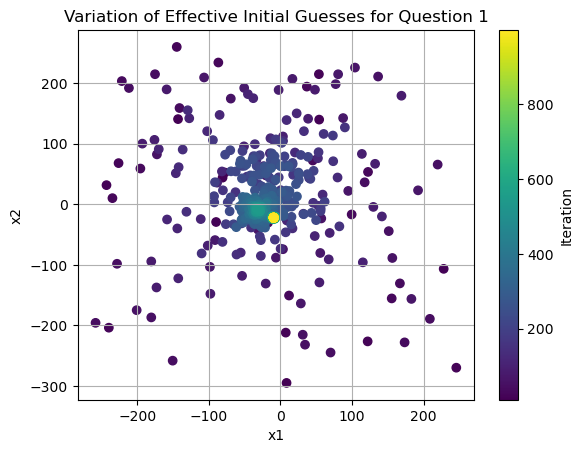

In [14]:
def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    x_best = None
    f_best = np.inf

    x_effective_list = []

    for k in range(K_max):
        x = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            chi = 0.5 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_effective = chi * x + (1 - chi) * x_best
            x_effective_list.append(x_effective)

        result = minimize(griewank, x, method='BFGS', tol=tolerance)
        x_opt = result.x
        f_opt = result.fun

        if k == 0 or f_opt < f_best:
            x_best = x_opt
            f_best = f_opt

        if f_best < tolerance:
            break

    return x_best, x_effective_list

# Set the parameters for Question 1
bounds_q1 = [-600, 600]
tolerance_q1 = 1e-8
K_warmup_q1 = 10
K_max_q1 = 1000

# Run the refined global optimizer for Question 1
x_optimal_q1, x_effective_list_q1 = refined_global_optimizer(bounds_q1, tolerance_q1, K_warmup_q1, K_max_q1)

# Print the final result for Question 1
print("Optimization Result for Question 1:")
print(f"x_optimal_q1 = {x_optimal_q1}, f(x_optimal_q1) = {griewank(x_optimal_q1)}")
print("Number of iterations for Question 1:", K_max_q1)

# Plot the variation of effective initial guesses for Question 1
iterations_q1 = range(K_warmup_q1, K_max_q1)
x_effective_array_q1 = np.array(x_effective_list_q1)
x1_effective_q1 = x_effective_array_q1[:, 0]
x2_effective_q1 = x_effective_array_q1[:, 1]

plt.scatter(x1_effective_q1, x2_effective_q1, c=iterations_q1, cmap='viridis')
plt.colorbar(label='Iteration')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.title('Variation of Effective Initial Guesses for Question 1')

plt.show()


Above is the figure of the variation of effective initial guesses. Because a generated random initial guess is used, you get a different result for the bounds. But we can see that there is a higher number of iterations at the brighter areas of the figure for the respective bounds which makes the convergence slower. 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In this last question we will try to set $\underline{K} = 100$ to see if the convergence is faster. We start by setting the new parameters for question 2. Then we run the refined global optimizer with the specified parameters for question 2 and print the final result. Lastly, we print out the final result including the optimal solution and its corresponding function value and generate a scatter plot to visualize the variation of effective initial guesses over the iterations. 

Optimization Result for Question 2:
x_optimal_q2 = [-18.84013275 -35.50755066], f(x_optimal_q2) = 0.4042938467095252
Number of iterations for Question 2: 1000


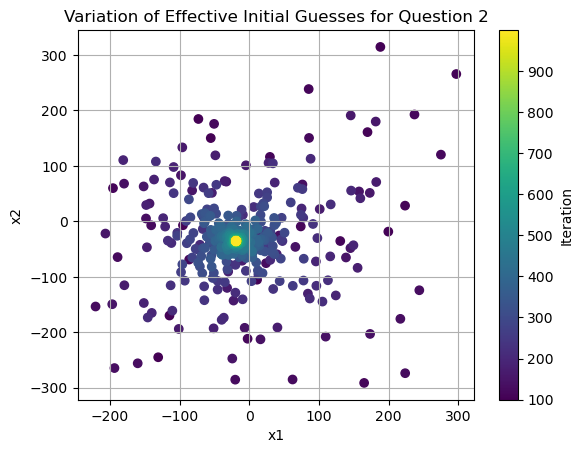

In [15]:
# Set the parameters for Question 2
bounds_q2 = [-600, 600]
tolerance_q2 = 1e-8
K_warmup_q2 = 100
K_max_q2 = 1000

# Run the refined global optimizer for Question 2
x_optimal_q2, x_effective_list_q2 = refined_global_optimizer(bounds_q2, tolerance_q2, K_warmup_q2, K_max_q2)

# Print the final result for Question 2
print("Optimization Result for Question 2:")
print(f"x_optimal_q2 = {x_optimal_q2}, f(x_optimal_q2) = {griewank(x_optimal_q2)}")
print("Number of iterations for Question 2:", K_max_q2)

# Plot the variation of effective initial guesses for Question 2
iterations_q2 = range(K_warmup_q2, K_max_q2)
x_effective_array_q2 = np.array(x_effective_list_q2)
x1_effective_q2 = x_effective_array_q2[:, 0]
x2_effective_q2 = x_effective_array_q2[:, 1]

plt.scatter(x1_effective_q2, x2_effective_q2, c=iterations_q2, cmap='viridis')
plt.colorbar(label='Iteration')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.title('Variation of Effective Initial Guesses for Question 2')

plt.show()

Above we see the plot displayed of the variation of effective initial guesses for question 2, where again it applies that there is a higher number of iterations at the brighter areas of the figure for the respective bounds which makes the convergence slower. To see if the convergence has become faster, we can compare the two results. When comparing f(x optimal) on the two results, we can see that Q2 is much lower, which means that theoretically it can make the convergence faster compared to Q1. This difference is due to Q2 having a K_warmup_q2 = 100, where Q1 has a K_warmup_q2 = 10. But when we do it in practice, Q1 is actually faster and thus also better than Q2, since we have a maximum limit K_max of 1000, which is far too few repetitions and therefore Q2 does not achieve to become faster than Q1 in practice.